In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.1.0-rc1


# TensorFlow 2.0 + Keras, 딥러닝 연구자들을 위한 오버뷰

*@fchollet, October 2019 (번역 @chansung)*
- 원본은 [TensorFlow 2.0 + Keras Overview for Deep Learning Researchers](https://colab.research.google.com/drive/1UCJt8EYjlzCs1H1d1X0iDGYJsHKwu-NO?fbclid=IwAR269Y-3J1DuZL01L6GBCC4dg6RSAmJXHnRfztL454dZ5SqKLRxCAZcxzgY)입니다.
---

**이 문서는 입문, 특강, 그리고 TensorFlow 2.0의 API를 빠르게 참조하는 목적을 위해 제공됩니다.**

---

TensorFlow와 Keras는 모두 약 4년전쯤 릴리즈 되었습니다 (Keras는 2015년 3월, TensorFlow는 2015년 11월). 이는 딥러닝 세계의 관점에서 볼 때, 꽤 오랜시간이라고 볼 수 있습니다!

과거에 TensorFlow 1.x + Keras는 여러가지 알려진 문제점을 가지고 있었습니다:
- TensorFlow를 사용한다는것은 정적인 계산 그래프를 조작함을 의미하는것으로, Imperative 코딩 스타일을 사용하는 프로그래머로 하여금 어렵고, 불편한 느낌을 받게 했었습니다.
- TensorFlow API가 매우 강력하면서도 유연하지만, 빠른 코드의 작성의 가능성이 결여되어 있었으며 종종 사용법은 어렵고 혼란스러웠습니다.
- Keras는 매우 생산적이고 사용이 쉽지만, 연구에 사용된 사례에서 종종 유연성이 결여되었었습니다.

---
### TensorFlow 2.0은 TensorFlow와 Keras를 대대적으로 새로이 디자인한 것으로, 지난 4년간의 사용자 피드백과 기술의 진보가 모두 고려되었습니다. 위에서 언급된 문제점들을 대규모로 수정합니다.

### 미래에서온 차세대 머신러닝 플랫폼입니다

---

TensorFlow 2.0은 아래와 같은 주요 아이디어에 기반하고 있습니다:

- 사용자들이 계산을 eagerly하게 수행할 수 있게 해줍니다. 이는 Numpy를 사용하는법과 유사합니다. 이는 TensorFlow 2.0을 이용한 프로그래밍이 직관적이며 동시에 파이토닉할 수 있게끔 해 줍니다.
- 컴파일된 그래프의 엄청난 이점을 그대로 보존하는데, 이는 성능, 분산, 그리고 배포를 위함입니다. 이 내용은 TensorFlow를 빠르고, 분산 구조에서의 확장 가능하며, 상용화에 준비될 수 있도록 해 줍니다.
- Keras를 딥러닝의 고수준 API로 채택하여, TensorFlow를 이해하기 쉬우면서도 높은 생산성을 가질 수 있게 만들어 줍니다.
- 매우 고수준(더 쉬운 사용성, 약간 부족한 유연성) 에서부터 매우 저수준(더 깊은 전문성, 매우 뛰어난 유연성)의 다양한 범위의 작업으로까지 Keras를 확장합니다.


# 파트 1: TensorFlow의 기본

## Tensors (텐서)

다음은 [상수형](https://www.tensorflow.org/api_docs/python/tf/constant) 텐서 입니다:

In [3]:
x = tf.constant([[5, 2], [1, 3]])
print(x)

tf.Tensor(
[[5 2]
 [1 3]], shape=(2, 2), dtype=int32)


해당 텐서의 값을 Numpy 배열형태로 가져오고 싶다면 `.numpy()`를 호출하면 됩니다:

In [4]:
x.numpy()

array([[5, 2],
       [1, 3]], dtype=int32)

Numpy 배열과 *꽤나* 유사한 점으로 `dtype`과 `shape`이라는 속성을 가집니다:

In [5]:
print('dtype:', x.dtype)
print('shape:', x.shape)

dtype: <dtype: 'int32'>
shape: (2, 2)


상수형 텐서를 생성하는 보편적인 방법은 `tf.ones`과 `tf.zeros`를 사용하는 것입니다(이는 Numpy의 `np.ones` 및 `np.zeros`와 유사합니다):

In [6]:
print(tf.ones(shape=(2, 1)))
print(tf.zeros(shape=(2, 1)))

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


## 랜덤한 상수형 텐서

다음은 랜덤한 [정규분포](https://www.tensorflow.org/api_docs/python/tf/random/normal)로부터 상수를 생성합니다:

In [7]:
tf.random.normal(shape=(2, 2), mean=0., stddev=1.)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-0.96094847,  1.5325116 ],
       [ 0.46021387, -1.5524384 ]], dtype=float32)>

*그리고* 다음은 랜덤한 [균등분포](https://www.tensorflow.org/api_docs/python/tf/random/uniform)로부터 값이 채워지는 정수형 텐서를 보여줍니다:

In [8]:
tf.random.uniform(shape=(2, 2), minval=0, maxval=10, dtype='int32')

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[4, 0],
       [1, 5]], dtype=int32)>

## Variables (변수)

[Variables](https://www.tensorflow.org/guide/variable)는 변할 수 있는 상태(뉴럴넷의 가중치와 같은)를 저장하는데 사용되는 특별한 텐서 입니다. 초기값을 사용해서 Variable을 생성할 수 있습니다:

In [9]:
initial_value = tf.random.normal(shape=(2, 2))
a = tf.Variable(initial_value)
print(a)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.78605187,  0.4288724 ],
       [-0.97228837,  0.04287118]], dtype=float32)>


`.assign(value)`, `.assign_add(increment)`, 또는 `.assign_sub(decrement)`와 같은 메소드를 사용해서 Variable의 값을 갱신합니다:

In [0]:
new_value = tf.random.normal(shape=(2, 2))
a.assign(new_value)
for i in range(2):
  for j in range(2):
    assert a[i, j] == new_value[i, j]

In [0]:
added_value = tf.random.normal(shape=(2, 2))
a.assign_add(added_value)
for i in range(2):
  for j in range(2):
    assert a[i, j] == new_value[i, j] + added_value[i, j]

## TensorFlow에서 수학을 하는것

TensorFlow는 Numpy를 사용하는것과 정확히 똑같은 방법으로 사용할 수 있습니다. 이 둘의 주요 다른점은 작성한 TensorFlow의 코드는 GPU와 TPU 상에서 실행될 수 있다는 점입니다:

In [0]:
a = tf.random.normal(shape=(2, 2))
b = tf.random.normal(shape=(2, 2))

c = a + b
d = tf.square(c)
e = tf.exp(d)

## `GradientTape`을 사용해서 경사도를 계산하는것

한 가지 더 Numpy와의 큰 차이점이 있습니다: 모든 미분가능한 표현에 대해서, 자동으로 경사도를 구하는 것이 가능합니다.

단순히 [`GradientTape`](https://www.tensorflow.org/api_docs/python/tf/GradientTape)를 열게되면, 그때부턴 `tape.watch()`를 통해 텐서를 확인하고, 이 텐서를 입력으로써 사용하는 미분가능한 표현을 구성하는것이 가능합니다:

In [13]:
a = tf.random.normal(shape=(2, 2))
b = tf.random.normal(shape=(2, 2))

with tf.GradientTape() as tape:
  tape.watch(a)  # `a`에 적용되는 연산의 히스토리에 대한 기록을 시작
  c = tf.sqrt(tf.square(a) + tf.square(b))  # `a`를 사용하여 몇 가지 수학을 수행
  # `a`에 대한 `c`의 경사도는 무엇인가?
  dc_da = tape.gradient(c, a)
  print(dc_da)

tf.Tensor(
[[-0.91336524  0.75875753]
 [-0.89846647  0.19701344]], shape=(2, 2), dtype=float32)


디폴트로는 Variable들은 자동으로 watch가 적용되어 있기 때문에, 수동으로 `watch`를 해 줄 필요는 없습니다:

In [14]:
a = tf.Variable(a)

with tf.GradientTape() as tape:
  c = tf.sqrt(tf.square(a) + tf.square(b))
  dc_da = tape.gradient(c, a)
  print(dc_da)

tf.Tensor(
[[-0.91336524  0.75875753]
 [-0.89846647  0.19701344]], shape=(2, 2), dtype=float32)


GradientTape을 중첩시켜서 고차원의 미분을 계산할 수도 있습니다:

In [15]:
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as tape:
    c = tf.sqrt(tf.square(a) + tf.square(b))
    dc_da = tape.gradient(c, a)
  d2c_da2 = outer_tape.gradient(dc_da, a)
  print(d2c_da2)

tf.Tensor(
[[0.15885639 0.18000741]
 [0.06969562 1.2608473 ]], shape=(2, 2), dtype=float32)


## end-to-end 예제: 선형 회귀

지금까지 TensorFlow는 Numpy와 비슷한 라이브러리인데, 추가적으로 GPU 또는 TPU를 통해 가속될 수 있고, 자동으로 미분이 계산된다는 내용을 배웠습니다. 그러면 이제는 end-to-end 예제를 알아볼 시간입니다: 머신러닝의 피즈버즈인, 선형 회귀를 구현해 봅시다. 

이를 보여주기 위해서, `Layer` 또는 `MeanSquaredError`와 같은 Keras의 고수준 컴포넌트를 사용하지 않을 것입니다. 단지 기본적인 연산자만을 사용합니다.

In [0]:
input_dim = 2
output_dim = 1
learning_rate = 0.01

# 가중치 행렬입니다
w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
# 편향 벡터입니다
b = tf.Variable(tf.zeros(shape=(output_dim,)))

def compute_predictions(features):
  return tf.matmul(features, w) + b

def compute_loss(labels, predictions):
  return tf.reduce_mean(tf.square(labels - predictions))

def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = compute_predictions(x)
    loss = compute_loss(y, predictions)
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

작성한 모델을 검증하기 위한, 인공적인 데이터를 생성해 보겠습니다:

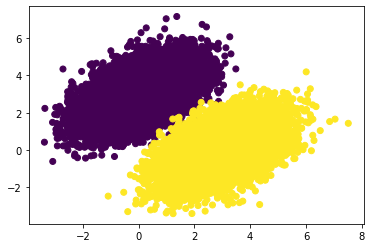

In [17]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터셋을 준비합니다
num_samples = 10000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
labels = np.vstack((np.zeros((num_samples, 1), dtype='float32'),
                    np.ones((num_samples, 1), dtype='float32')))

plt.scatter(features[:, 0], features[:, 1], c=labels[:, 0])

그러면, 데이터의 배치크기 단위로 돌면서, `train_on_batch` 함수를 반복적으로 호출하여 선형 회귀 모델을 학습시켜 봅시다:

In [18]:
# 데이터를 무작위로 섞습니다
random.Random(1337).shuffle(features)
random.Random(1337).shuffle(labels)

# 손쉽게 배치화된 반복을 위해, tf.data.Dataset 객체를 생성합니다
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

for epoch in range(10):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
  print('Epoch %d: 마지막 배치의 손실값 = %.4f' % (epoch, float(loss)))

Epoch 0: 마지막 배치의 손실값 = 0.0838
Epoch 1: 마지막 배치의 손실값 = 0.0735
Epoch 2: 마지막 배치의 손실값 = 0.0408
Epoch 3: 마지막 배치의 손실값 = 0.0249
Epoch 4: 마지막 배치의 손실값 = 0.0268
Epoch 5: 마지막 배치의 손실값 = 0.0235
Epoch 6: 마지막 배치의 손실값 = 0.0229
Epoch 7: 마지막 배치의 손실값 = 0.0393
Epoch 8: 마지막 배치의 손실값 = 0.0302
Epoch 9: 마지막 배치의 손실값 = 0.0369


아래는 우리가 만든 모델이 얼마나 잘 동작하는지를 보여줍니다:

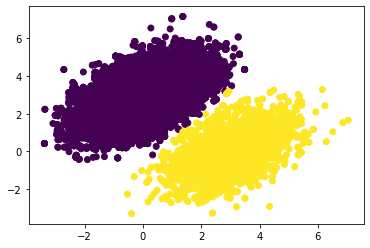

In [19]:
predictions = compute_predictions(features)
plt.scatter(features[:, 0], features[:, 1], c=predictions[:, 0] > 0.5)

## `tf.function`를 이용해서 속도를 빠르게 하기

현재의 코드는 얼마나 빨리 수행될까요?

In [20]:
import time

t0 = time.time()
for epoch in range(20):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
t_end = time.time() - t0
print('epoch당 걸린 시간: %.3f 초' % (t_end / 20,))


epoch당 걸린 시간: 0.238 초


학습 함수를 정적 그래프로 컴파일 해 봅시다. 이를 위해서 해야할 것은 문자 그대로, `tf.function`이라는 데코레이터를 위에 넣어주는것 뿐입니다:

In [0]:
@tf.function
def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = compute_predictions(x)
    loss = compute_loss(y, predictions)
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

다시한번 시간을 측정해 봅시다:

In [22]:
t0 = time.time()
for epoch in range(20):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
t_end = time.time() - t0
print('epoch당 걸린 시간: %.3f 초' % (t_end / 20,))

epoch당 걸린 시간: 0.105 초


걸린 시간이 약 40% 감소했습니다. 이 경우, 매우 간단한 모델을 사용했습니다; 일반적으로 모델이 크면 클 수록, 정적 그래프를 활용한 속도 개선은 더 많이 이뤄집니다.

기억해야할 것이 있습니다: eager 실행모드는 디버깅과 코드 라인별 결과를 출력하는데 매우 유용하지만, 크기를 키워야할 시기가 오면, 정적 그래프가 연구자들에게 최고의 친구가 될 것입니다.

# tf.keras를 이용한 가장 간단한 방법

In [0]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [24]:
model = Sequential([layers.Dense(output_dim, input_shape=(input_dim,))])
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
              loss='MSE')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(features, labels, batch_size=256, epochs=10)

Train on 20000 samples
Epoch 1/10
20000/20000 [==============================] - 0s 23us/sample - loss: 0.6169
Epoch 2/10
20000/20000 [==============================] - 0s 9us/sample - loss: 0.0255
Epoch 3/10
20000/20000 [==============================] - 0s 8us/sample - loss: 0.0241
Epoch 4/10
20000/20000 [==============================] - 0s 8us/sample - loss: 0.0235
Epoch 5/10
20000/20000 [==============================] - 0s 9us/sample - loss: 0.0231
Epoch 6/10
20000/20000 [==============================] - 0s 9us/sample - loss: 0.0229
Epoch 7/10
20000/20000 [==============================] - 0s 9us/sample - loss: 0.0228
Epoch 8/10
20000/20000 [==============================] - 0s 9us/sample - loss: 0.0228
Epoch 9/10
20000/20000 [==============================] - 0s 8us/sample - loss: 0.0227
Epoch 10/10
20000/20000 [==============================] - 0s 8us/sample - loss: 0.0227


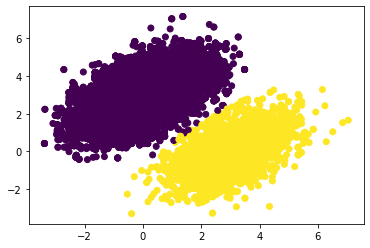

In [26]:
predictions = model.predict(features)
plt.scatter(features[:, 0], features[:, 1], c=predictions[:, 0] > 0.5)